In [103]:
import glob
import subprocess
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

root_directory="/Users/hanajaafari/Desktop"
awsem_directory_tools=os.path.join(root_directory,"awsemmd-master/tools/results_analysis_tools")
pdb_tools_directory=os.path.join(root_directory,"pdb-tools-master/pdbtools")
AWSEM_server_files=os.path.join(root_directory,"Time-Devolution-Calc/AWSEM_Energy_Calculations/06_02_2020_Online_AWSEM_Suite_Analysis/ENSP00000009589/Output_files/8da86a50-7eb4-49a5-aa2a-e5c9abb745d3")
AWSEM_simulation_files=os.path.join(root_directory,"Time-Devolution-Calc/AWSEM_Energy_Calculations/06_01_2020_Global_AWSEM_Energy_Calculation_Search_Complete_Coverage/PF00338")

## Plotting paramters

In [104]:
dpi = 200
font = {'family' : 'sans',
        'size'   : 24}
mpl.rc('font', **font)

## Analyzing AWSEM Suite Server Results

In [105]:
trimmed_files_directory=os.path.join(AWSEM_server_files,"../trimmed_output_files")
try:
    os.mkdir(trimmed_files_directory)
except:
    shutil.rmtree(trimmed_files_directory)
    os.mkdir(trimmed_files_directory)

for pdb_file in glob.glob(f"{AWSEM_server_files}/best_*_*.pdb"):
    shutil.copyfile(pdb_file,f"{trimmed_files_directory}/{pdb_file.split('/')[-1]}")

simulation_run=[]; pdb_Q_value=[]
for pdb_file in glob.glob(f"{trimmed_files_directory}/best_*_*[!trimmed].pdb"):
    pdb_file_name=pdb_file.split('/')[-1]
    simulation_run.append(pdb_file_name)
    with open(f"{trimmed_files_directory}/{pdb_file_name}_trimmed.pdb","w") as output:
        subprocess.call(["python",f"{pdb_tools_directory}/pdb_delres.py","-1:15",pdb_file],stdout=output)
    subprocess.check_output(["python",f"{awsem_directory_tools}/CalcPdbQ.py",f"{root_directory}/4kzz_U.pdb",
                             f"{trimmed_files_directory}/{pdb_file_name}_trimmed.pdb",
                             f"{trimmed_files_directory}/{pdb_file_name}_4kzz_U_Q.txt",".15"])
    q_value=open(f"{trimmed_files_directory}/{pdb_file_name}_4kzz_U_Q.txt").readlines()
    pdb_Q_value.append(float(q_value[0]))

df = pd.DataFrame(data={"pdb_file":simulation_run, "Q_value":pdb_Q_value})                            

In [106]:
df.sort_values(by=["pdb_file"], inplace=True)
df

,pdb_file,Q_value
4,best_1_1.pdb,0.399
0,best_1_2.pdb,0.390
1,best_1_3.pdb,0.383
11,best_2_1.pdb,0.593
10,best_2_2.pdb,0.649
9,best_2_3.pdb,0.581
2,best_3_1.pdb,0.464
5,best_3_2.pdb,0.459
3,best_3_3.pdb,0.462
14,best_4_1.pdb,0.464


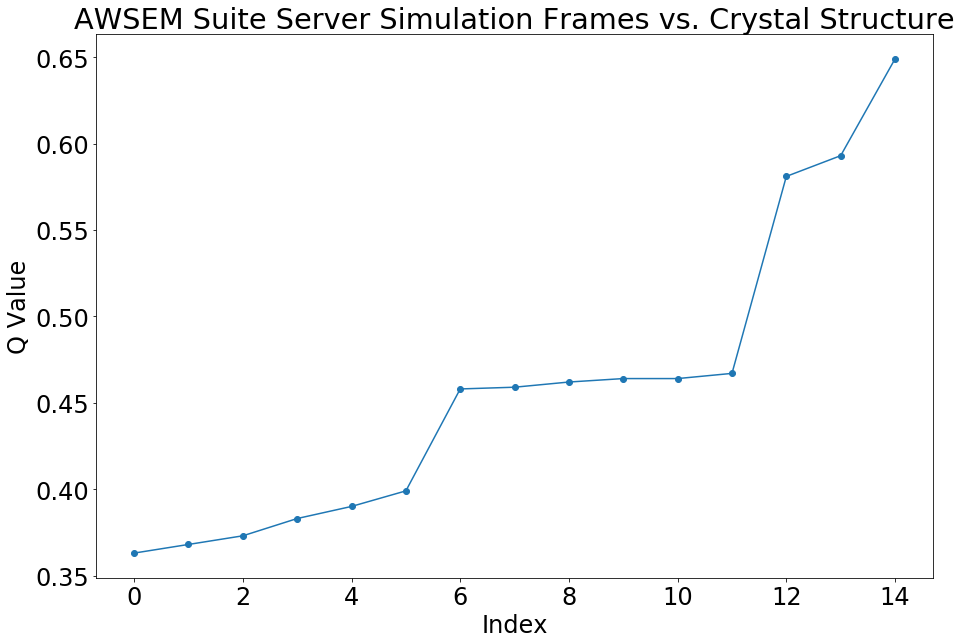

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(range(0,15),sorted(pdb_Q_value),"-o")
plt.xlabel("Index")
plt.ylabel("Q Value")
plt.title("AWSEM Suite Server Simulation Frames vs. Crystal Structure")
plt.savefig(f"{trimmed_files_directory}/{prot_name}-AWSEM_Suite_Server-Q_values-dpi{dpi}.png")
plt.show()

## Analyzing AWSEM Simulations Results

In [108]:
trimmed_files_directory=os.path.join(AWSEM_simulation_files,"../06_17_2020_trimmed_AWSEM_simulation_frames")
try:
    os.mkdir(trimmed_files_directory)
except:
    shutil.rmtree(trimmed_files_directory)
    os.mkdir(trimmed_files_directory)
    
for pdb_file in glob.glob(f"{AWSEM_simulation_files}/**/*_final_frame.pdb",recursive=True):
    try:
        os.mkdir(f"{trimmed_files_directory}/{pdb_file.split('/')[-3]}")
    except:
        pass
    shutil.copyfile(pdb_file,f"{trimmed_files_directory}/{pdb_file.split('/')[-3]}/{pdb_file.split('/')[-2]}_{pdb_file.split('/')[-1]}")

### ENSP00000009589 AWSEM Simulations Q Value
Qw value calculations between the frame with the lowest AWSEM energy in each of the 10 simulations for the three AWSEM models (AWSEM-ER,AWSEM-Suite,and AWSEM-Template), and the 4KZZ_U crystal structure. The frames are trimmed at the N-terminal, since 4KZZ_U starts at index 16.

In [109]:
simulation_run={"ENSP00000009589_AWSEM_ER":[],"ENSP00000009589_AWSEM_Suite":[],"ENSP00000009589_AWSEM_Template":[]}

for pdb_file in glob.glob(f"{trimmed_files_directory}/**/*ENSP00000009589_final_frame.pdb",recursive=True):
    pdb_file_name=pdb_file.split('/')[-1]; directory_name=pdb_file.split('/')[-2]
    with open(f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_trimmed.pdb","w") as output:
        subprocess.call(["python",f"{pdb_tools_directory}/pdb_delres.py","-1:15",pdb_file],stdout=output)
    subprocess.check_output(["python",f"{awsem_directory_tools}/CalcPdbQ.py",f"{root_directory}/4kzz_U.pdb",
                             f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_trimmed.pdb",
                             f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_4kzz_U_Q.txt",".15"])
    q_value=open(f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_4kzz_U_Q.txt").readlines()
    simulation_run[pdb_file.split('/')[-2]].append(float(q_value[0]))
    
for run in simulation_run:
    simulation_run[run] = sorted(simulation_run[run])
                    
df = pd.DataFrame(data=simulation_run) 
df

,ENSP00000009589_AWSEM_ER,ENSP00000009589_AWSEM_Suite,ENSP00000009589_AWSEM_Template
0,0.207,0.529,0.595
1,0.233,0.530,0.598
2,0.235,0.543,0.604
3,0.243,0.546,0.605
4,0.252,0.547,0.633
5,0.268,0.554,0.639
6,0.272,0.571,0.664
7,0.272,0.591,0.669
8,0.284,0.621,0.674
9,0.287,0.650,0.706


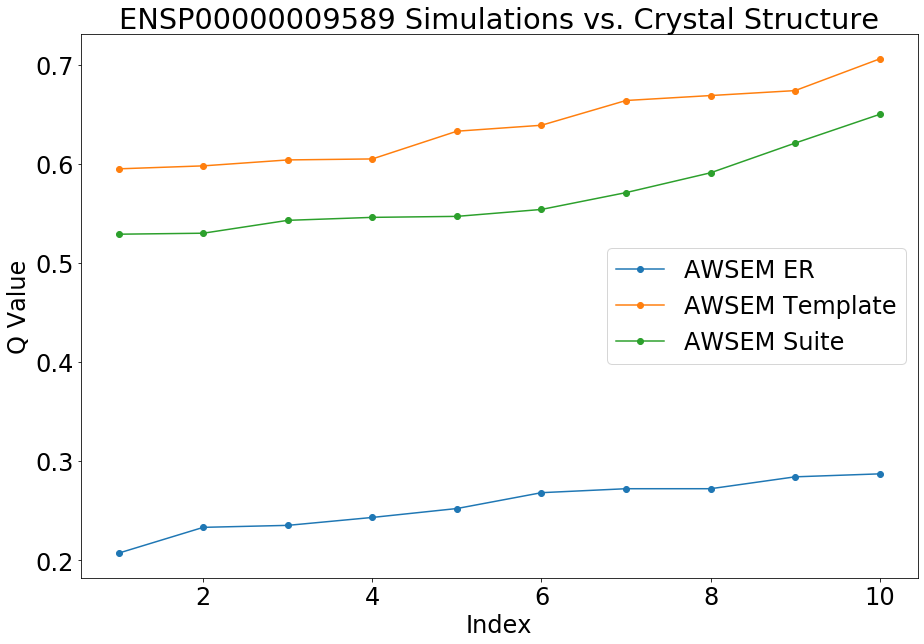

In [110]:
prot_name = "ENSP00000009589"
plt.figure(figsize=(15,10))
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_ER"],"-o",label=f"AWSEM ER")
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_Template"],"-o",label=f"AWSEM Template")
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_Suite"],"-o",label=f"AWSEM Suite")
plt.xlabel("Index")
plt.ylabel("Q Value")
plt.title(f"{prot_name} Simulations vs. Crystal Structure")
plt.legend(loc="best")
plt.savefig(f"{trimmed_files_directory}/{prot_name}-Q_values-dpi{dpi}.png")
plt.show()

### PGOHUM00000238297 AWSEM Simulations Q Value
Qw value calculations between the frame with the lowest AWSEM energy in each of the 10 simulations for the three AWSEM models (AWSEM-ER,AWSEM-Suite,and AWSEM-Template), and the 4KZZ_U crystal structure. The frames are trimmed at the N-terminal, since 4KZZ_U starts at index 16.

In [112]:
simulation_run={"PGOHUM00000238297_AWSEM_ER":[],"PGOHUM00000238297_AWSEM_Suite":[],"PGOHUM00000238297_AWSEM_Template":[]}

for pdb_file in glob.glob(f"{trimmed_files_directory}/**/*PGOHUM00000238297_final_frame.pdb",recursive=True):
    pdb_file_name=pdb_file.split('/')[-1]; directory_name=pdb_file.split('/')[-2]
    with open(f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_trimmed.pdb","w") as output:
        subprocess.call(["python",f"{pdb_tools_directory}/pdb_delres.py","-1:15",pdb_file],stdout=output)
    subprocess.check_output(["python",f"{awsem_directory_tools}/CalcPdbQ.py",f"{root_directory}/4kzz_U.pdb",
                             f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_trimmed.pdb",
                             f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_4kzz_U_Q.txt",".15"])
    q_value=open(f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_4kzz_U_Q.txt").readlines()
    simulation_run[pdb_file.split('/')[-2]].append(float(q_value[0]))
    
for run in simulation_run:
    simulation_run[run] = sorted(simulation_run[run])
                    
df = pd.DataFrame(data=simulation_run)  
df

,PGOHUM00000238297_AWSEM_ER,PGOHUM00000238297_AWSEM_Suite,PGOHUM00000238297_AWSEM_Template
0,0.212,0.541,0.536
1,0.225,0.562,0.588
2,0.227,0.567,0.622
3,0.229,0.574,0.624
4,0.232,0.584,0.629
5,0.235,0.590,0.650
6,0.235,0.611,0.651
7,0.262,0.628,0.651
8,0.267,0.644,0.661
9,0.279,0.661,0.670


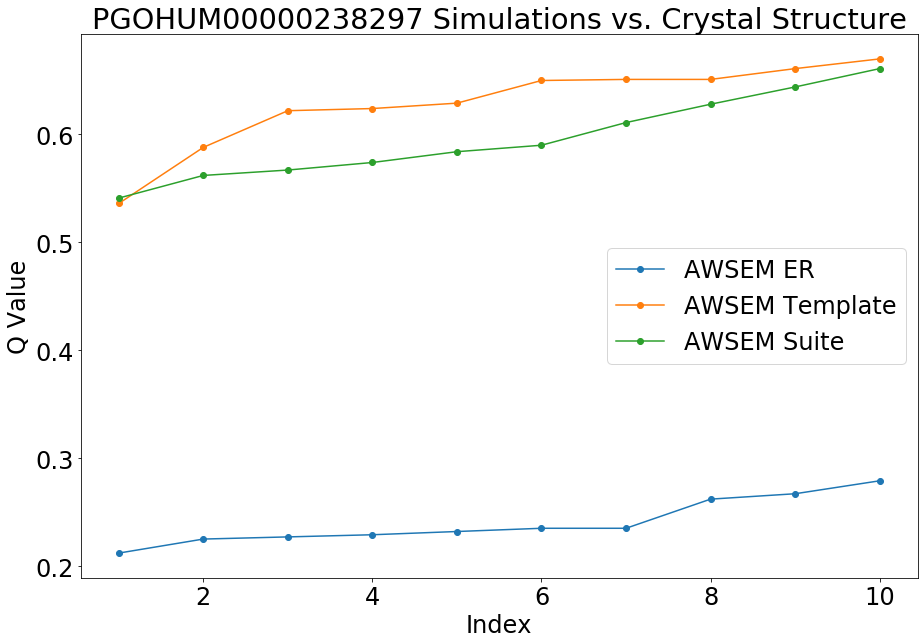

In [113]:
prot_name = "PGOHUM00000238297"
plt.figure(figsize=(15,10))
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_ER"],"-o",label=f"AWSEM ER")
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_Template"],"-o",label=f"AWSEM Template")
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_Suite"],"-o",label=f"AWSEM Suite")
plt.xlabel("Index")
plt.ylabel("Q Value")
plt.title(f"{prot_name} Simulations vs. Crystal Structure")
plt.legend(loc="best")
plt.savefig(f"{trimmed_files_directory}/{prot_name}-Q_values-dpi{dpi}.png")
plt.show()

### PGOHUM00000242223 AWSEM Simulations Q Value
Qw value calculations between the frame with the lowest AWSEM energy in each of the 10 simulations for the three AWSEM models (AWSEM-ER,AWSEM-Suite,and AWSEM-Template), and the 4KZZ_U crystal structure. The frames are trimmed at the N-terminal, since 4KZZ_U starts at index 16.

In [114]:
simulation_run={"PGOHUM00000242223_AWSEM_ER":[],"PGOHUM00000242223_AWSEM_Suite":[],"PGOHUM00000242223_AWSEM_Template":[]}

for pdb_file in glob.glob(f"{trimmed_files_directory}/**/*PGOHUM00000242223_final_frame.pdb",recursive=True):
    pdb_file_name=pdb_file.split('/')[-1]; directory_name=pdb_file.split('/')[-2]
    with open(f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_trimmed.pdb","w") as output:
        subprocess.call(["python",f"{pdb_tools_directory}/pdb_delres.py","-1:15",pdb_file],stdout=output)
    subprocess.check_output(["python",f"{awsem_directory_tools}/CalcPdbQ.py",f"{root_directory}/4kzz_U.pdb",
                             f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_trimmed.pdb",
                             f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_4kzz_U_Q.txt",".15"])
    q_value=open(f"{trimmed_files_directory}/{directory_name}/{pdb_file_name}_4kzz_U_Q.txt").readlines()
    simulation_run[pdb_file.split('/')[-2]].append(float(q_value[0]))
    
for run in simulation_run:
    simulation_run[run] = sorted(simulation_run[run])
                    
df = pd.DataFrame(data=simulation_run)  
df

,PGOHUM00000242223_AWSEM_ER,PGOHUM00000242223_AWSEM_Suite,PGOHUM00000242223_AWSEM_Template
0,0.210,0.521,0.516
1,0.212,0.526,0.566
2,0.225,0.528,0.567
3,0.226,0.529,0.569
4,0.238,0.547,0.573
5,0.238,0.555,0.579
6,0.245,0.558,0.620
7,0.249,0.574,0.630
8,0.252,0.589,0.653
9,0.253,0.630,0.702


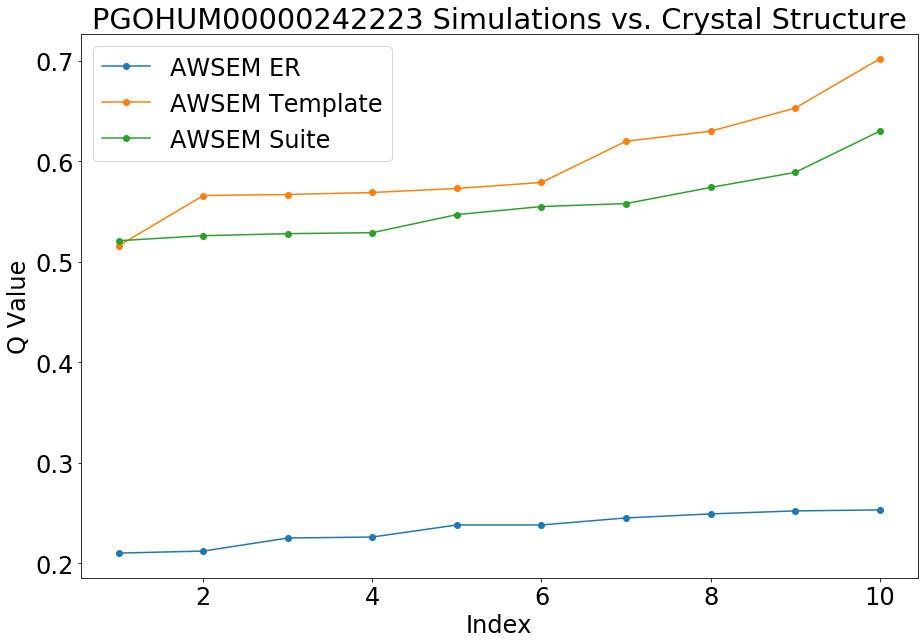

In [115]:
prot_name = "PGOHUM00000242223"
plt.figure(figsize=(15,10))
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_ER"],"-o",label=f"AWSEM ER")
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_Template"],"-o",label=f"AWSEM Template")
plt.plot(range(1,11),df[f"{prot_name}_AWSEM_Suite"],"-o",label=f"AWSEM Suite")
plt.xlabel("Index")
plt.ylabel("Q Value")
plt.title(f"{prot_name} Simulations vs. Crystal Structure")
plt.legend(loc="best")
plt.savefig(f"{trimmed_files_directory}/{prot_name}-Q_values-dpi{dpi}.png")
plt.show()

### Analysis of Results

In [121]:
ENSP00000009589_sequence="MAFKDTGKTPVEPEVAIHRIRITLTSRNVKSLEKVCADLIRGAKEKNLKVKGPVRMPTKTLRITTRKTPCGEGSKTWDRFQMRIHKRLIDLHSPSEIVKQITSISIEPGVEVEVTIADA"
PGOHUM00000238297_sequence="MAFKDTGKTPVEPEVAIHRIRITLTSRSVKSLEKVGADLIRGAKAKNLKVKGGVRMPSKTLRITTRKTPCGEGSKTWDRFQMRIHKRLFDLHSPSEIVKQITSISTEPGVEVEVTIADA"
PGOHUM00000242223_sequence="MAFKDTGKTPVEPEVAIHRIRITLTSRNIKSLEKVCADLIRGAKEKNLKVKGPVRMLTKTLRITTRKTPCGEGSKTWDRFQMRIHQRLIDLHSPSEIVKQITSISIEPGVEVEVTIADA"

ENSP00000009589_PGOHUM00000238297_diff=[i for i in range(len(ENSP00000009589_sequence)) 
                                        if ENSP00000009589_sequence[i] != PGOHUM00000238297_sequence[i]]

df1= pd.DataFrame(data={"Substitution Indexes": ENSP00000009589_PGOHUM00000238297_diff, 
                       "ENSP00000009589 Residues": [ENSP00000009589_sequence[i] for i in ENSP00000009589_PGOHUM00000238297_diff],
                      "PGOHUM00000238297 Residues": [PGOHUM00000238297_sequence[i] for i in ENSP00000009589_PGOHUM00000238297_diff]})
df1

,Substitution Indexes,ENSP00000009589 Residues,PGOHUM00000238297 Residues
0,27,N,S
1,35,C,G
2,44,E,A
3,52,P,G
4,57,T,S
5,88,I,F
6,105,I,T


In [122]:
ENSP00000009589_PGOHUM00000242223_diff=[i for i in range(len(ENSP00000009589_sequence)) 
                                        if ENSP00000009589_sequence[i] != PGOHUM00000242223_sequence[i]]
df2= pd.DataFrame(data={"Substitution Indexes": ENSP00000009589_PGOHUM00000242223_diff, 
                       "ENSP00000009589 Residues": [ENSP00000009589_sequence[i] for i in ENSP00000009589_PGOHUM00000242223_diff],
                      "PGOHUM00000242223 Residues": [PGOHUM00000242223_sequence[i] for i in ENSP00000009589_PGOHUM00000242223_diff]})

df2

,Substitution Indexes,ENSP00000009589 Residues,PGOHUM00000242223 Residues
0,28,V,I
1,56,P,L
2,85,K,Q
